In [3]:
# ch01/avg.py
import numpy as np

# np.random.seed(0) # 시드 고정
# rewards = []

# for n in range(1, 11): # 10번 플레이
#     reward = np.random.rand() # 보상(무작위 수로 시뮬레이션)
#     rewards.append(reward)
#     Q = sum(rewards) / n
#     print(Q)

# 개선 버전
Q = 0

for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    # Q += (reward - Q) / n
    print(Q)
    

0.5574971452169645
0.4958281136488216
0.37125105488935245
0.44233747794131834
0.505204157293696
0.4476670400742828
0.4492086515110889
0.4078138815952267
0.44459971790452063
0.4919361271211953


In [54]:
bandit = Bandit()

for i in range(3):
    print(bandit.play(0))
    print(bandit.play(3))

0
0
0
0
0
1


In [48]:
bandit = Bandit()
Q = 0

for n in range(1, 11): # 10번 반복
    reward = bandit.play(0) # 0번째 슬롯머신 플레이
    Q += (reward - Q) / n # 가치 추정치 갱신
    print(Q)

0.0
0.5
0.33333333333333337
0.25
0.2
0.16666666666666669
0.2857142857142857
0.25
0.2222222222222222
0.19999999999999998


In [49]:
bandit = Bandit()
Qs = np.zeros(10) # 각 슬롯머신의 가치 추정치
ns = np.zeros(10) # 각 슬롯머신의 플레이 횟수

for n in range(0):
    action = random.randint(0, 10) # 임의의 슬롯머신 선택(무작위 행동)
    reward = bandit(action)
    
    Qs[action] += (reward - Qs[action]) / ns[action]
    ns[action] += 1 # action번째 슬롯머신을 플레이한 횟수 증가
    print(Qs)

933


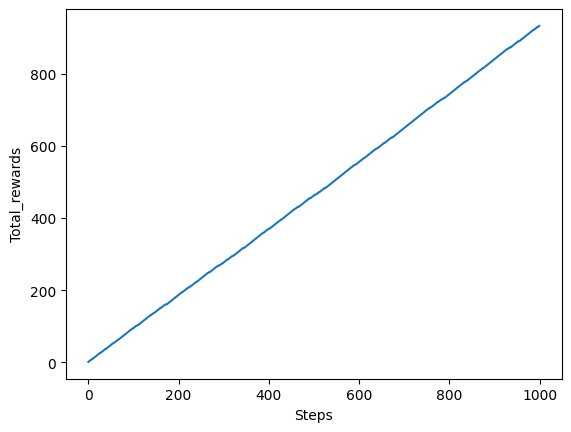

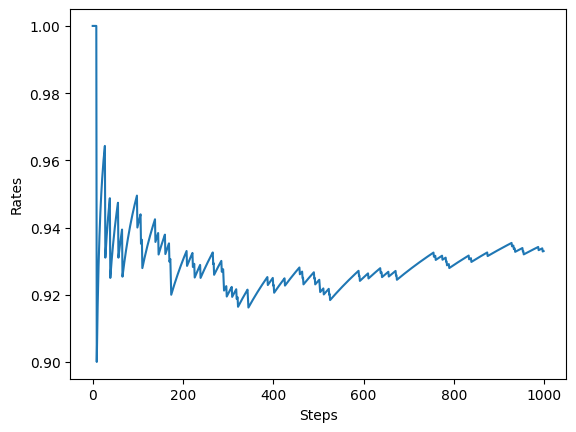

In [5]:
# ch01/bandit.py
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, arms=10): # arms = 슬롯머신 대수
        self.rates = np.random.rand(arms) # 슬롯머신 각각의 승률 설정(무작위)
        
    def play(self, arm):
        rate = self.rates[arm]
        
        if rate > np.random.rand(): # 무작위 수와 승률 비교
            return 1
        else:
            return 0

class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon # 무작위로 행동할 확률(탐색 확률)
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
    
    def update(self, action, reward): # 슬롯머신의 가치 추정
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
        
    def get_action(self): # 행동 선택(epsilon-greedy policy)
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs)) # 무작위 행동 선택(10대의 슬롯머신 중 하나 선택)
        return np.argmax(self.Qs) # 탐욕 행동 선택
          
# 행동 1000번 수행 -> 보상 얼마?
steps = 1000
epsilon = 0.1 # 무작위 행동 확률 10%

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = [] # 보상 합
rates = [] # 승률

for step in range(steps):
    action = agent.get_action() # 행동 선택
    reward = bandit.play(action) # 실제로 플레이하고 보상을 받음
    agent.update(action, reward) # 행동과 보상을 통해 학습
    total_reward += reward
    
    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))

print(total_reward)

# 그래프 그리기: 단계별 보상 총합
plt.ylabel('Total_rewards')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# 그래프 그리기: 단계별 승률
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

In [4]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

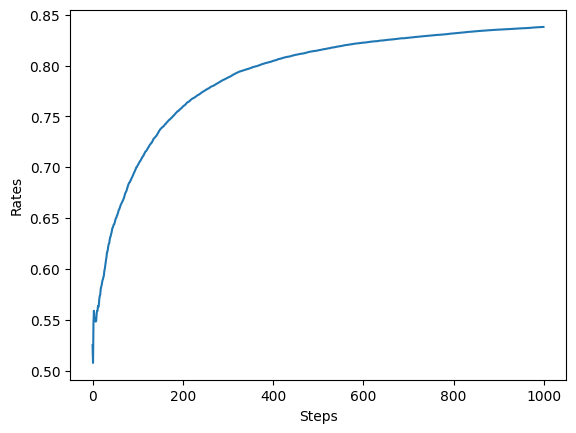

In [78]:
# ch01/bandit_avg.py
runs = 200 
steps = 1000
# epsilon = 0.01
epsilon = 0.1 # 무작위 행동(탐색) 확률 10%
# epsilon = 0.3 # 무작위 행동(탐색) 확률 30%
# epsilon = 0.5 # 무작위 행동(탐색) 확률 50%
all_rates = np.zeros((runs, steps)) # (200, 1000) 형상 배열

for run in range(runs): # 200번 실험
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = [] # 승률

    for step in range(steps):
        action = agent.get_action() # 행동 선택
        reward = bandit.play(action) # 실제로 플레이하고 보상을 받음
        agent.update(action, reward) # 행동과 보상을 통해 학습
        total_reward += reward
        
        rates.append(total_reward / (step+1))
    
    all_rates[run] = rates # 보상 결과 기록 
    
avg_rates = np.average(all_rates, axis=0) # 각 단계의 평균 저장

# 그래프 그리기: 단계별 승률(200번 실험 후 평균)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

In [79]:
# ch01/non_stationary.py
import numpy as np

class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)
    
    def play(self, arm):
        rate = self.rates[arm]
        self.rates = np.random.randn(arm) # 노이즈 추가
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [80]:
# ch01/non_stationary.py
import numpy as np

class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha # 고정값 alpha
        
    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
        
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)